## Text corpus creation and binary classification using DNN

In [ ]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Dataset Creation

In [ ]:
df = pd.read_csv('quotes.csv',encoding='cp1252')

In [ ]:
df

,Quotes,Labels
0,Trying is the first step toward failure.,0
1,He who laughs last didn’t get the joke.,0
2,The reward for good work is more work,0
3,I love mankind; it’s people I can’t stand!,0
4,"Accept that you’re just a product, not a gift.",0
5,Happy people do not wake up for breakfast.,0
6,Too much of a good thing can be wonderful.,0
7,I am free of all prejudice. I hate everyone eq...,0
8,Not everything is a lesson. Sometimes you just...,0
9,Hope is the first step on the road to disappoi...,0


In [ ]:
df.shape

(40, 2)

In [ ]:
df.columns

Index(['Quotes', 'Labels'], dtype='object')

In [ ]:
df['Labels'].value_counts()

0    20
1    20
Name: Labels, dtype: int64

In [ ]:
X = df['Quotes']
y = df['Labels']

## 2. Pre-processing

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocessing(sentences):
    tokens = sentences.lower().split()
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(lemmatized)

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
temp = X.tolist()
n_X = []
for i in temp:
    n_X.append(preprocessing(i))

In [ ]:
import numpy as np

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(n_X).toarray()
features_name = tfidf.get_feature_names_out()

In [ ]:
print(X_tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 3. Data Preparation

In [ ]:
X_train ,X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30, 187)
(30,)
(10, 187)
(10,)


## 4. Model Creation

### Initial Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.6910 - val_accuracy: 0.6000 - 1s/epoch - 325ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6839 - accuracy: 0.6333 - val_loss: 0.6916 - val_accuracy: 0.6000 - 61ms/epoch - 15ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6756 - accuracy: 0.7000 - val_loss: 0.6921 - val_accuracy: 0.6000 - 82ms/epoch - 21ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6678 - accuracy: 0.7667 - val_loss: 0.6926 - val_accuracy: 0.6000 - 93ms/epoch - 23ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6598 - accuracy: 0.8333 - val_loss: 0.6930 - val_accuracy: 0.6000 - 95ms/epoch - 24ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6520 - accuracy: 0.8667 - val_loss: 0.6934 - val_accuracy: 0.6000 - 115ms/epoch - 29ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6440 - accuracy: 0.9000 - val_loss: 0.6939 - val_accuracy: 0.6000 - 80ms/epoch - 20ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6359 - accuracy: 0.9000 - val_loss: 0.6942 - val_accuracy: 0.6000 - 90ms/epoch - 23ms/step
Epoch 9/100
4/4 - 0s - l

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                6016      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 73ms/step - loss: 0.9338 - accuracy: 0.4000


[0.9338079690933228, 0.4000000059604645]

In [ ]:
def accuracy_plot(model):
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

In [ ]:
def loss_plot(model):
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

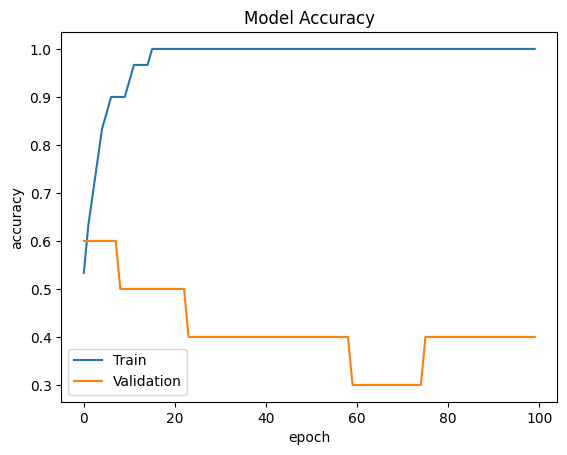

In [ ]:
accuracy_plot(history)

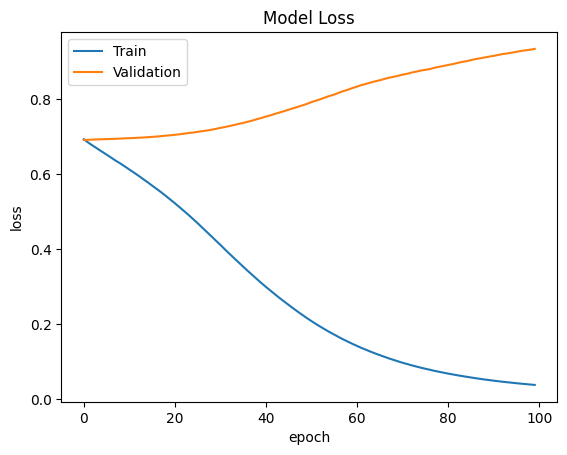

In [ ]:
loss_plot(history)

## 5. Analysis

### a. Model improvement - 1

In [ ]:
model1 = Sequential()
model1.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 3s - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6832 - val_accuracy: 0.7000 - 3s/epoch - 649ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6897 - accuracy: 0.5667 - val_loss: 0.6831 - val_accuracy: 0.7000 - 233ms/epoch - 58ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6877 - accuracy: 0.5667 - val_loss: 0.6834 - val_accuracy: 0.7000 - 195ms/epoch - 49ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6855 - accuracy: 0.6000 - val_loss: 0.6832 - val_accuracy: 0.7000 - 204ms/epoch - 51ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6832 - accuracy: 0.6667 - val_loss: 0.6830 - val_accuracy: 0.7000 - 169ms/epoch - 42ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6811 - accuracy: 0.7333 - val_loss: 0.6827 - val_accuracy: 0.7000 - 145ms/epoch - 36ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6790 - accuracy: 0.7667 - val_loss: 0.6824 - val_accuracy: 0.7000 - 133ms/epoch - 33ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6766 - accuracy: 0.7667 - val_loss: 0.6819 - val_accuracy: 0.7000 - 86ms/epoch - 22ms/step
Epoch 9/100
4/4 - 0

In [70]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 1504      
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,585
Trainable params: 1,585
Non-trainable params: 0
_________________________________________________________________


In [85]:
model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 58ms/step - loss: 0.6865 - accuracy: 0.5000


[0.6864554286003113, 0.5]

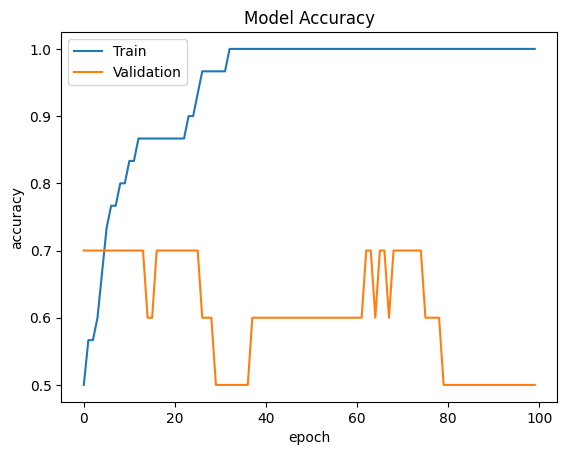

In [ ]:
accuracy_plot(history1)

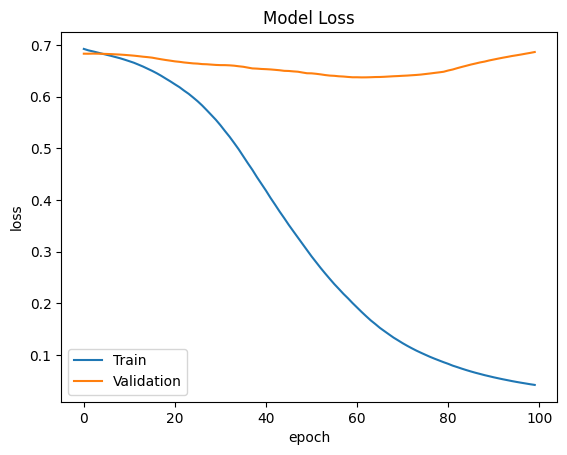

In [ ]:
loss_plot(history1)

In [ ]:
model2 = Sequential()
model2.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6928 - accuracy: 0.5333 - val_loss: 0.7062 - val_accuracy: 0.3000 - 1s/epoch - 356ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6880 - accuracy: 0.5667 - val_loss: 0.7066 - val_accuracy: 0.3000 - 175ms/epoch - 44ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6845 - accuracy: 0.6000 - val_loss: 0.7071 - val_accuracy: 0.3000 - 97ms/epoch - 24ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6811 - accuracy: 0.6333 - val_loss: 0.7075 - val_accuracy: 0.3000 - 128ms/epoch - 32ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6778 - accuracy: 0.6333 - val_loss: 0.7081 - val_accuracy: 0.3000 - 163ms/epoch - 41ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6744 - accuracy: 0.7000 - val_loss: 0.7086 - val_accuracy: 0.3000 - 140ms/epoch - 35ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6712 - accuracy: 0.7667 - val_loss: 0.7092 - val_accuracy: 0.3000 - 150ms/epoch - 37ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6683 - accuracy: 0.7667 - val_loss: 0.7102 - val_accuracy: 0.3000 - 211ms/epoch - 53ms/step
Epoch 9/100
4/4 - 0

In [71]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                3008      
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,297
Trainable params: 3,297
Non-trainable params: 0
_________________________________________________________________


In [86]:
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 51ms/step - loss: 0.9991 - accuracy: 0.3000


[0.9990969896316528, 0.30000001192092896]

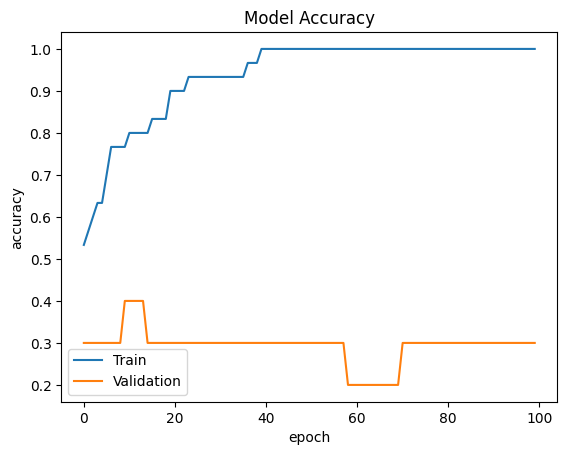

In [ ]:
accuracy_plot(history2)

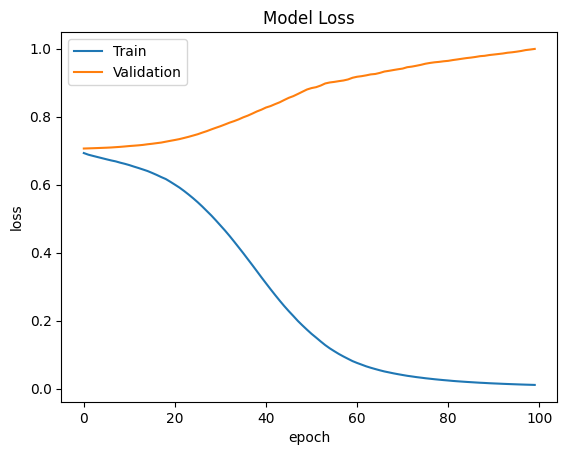

In [ ]:
loss_plot(history2)

In [ ]:
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6949 - accuracy: 0.4667 - val_loss: 0.6828 - val_accuracy: 0.8000 - 728ms/epoch - 182ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6855 - accuracy: 0.6333 - val_loss: 0.6833 - val_accuracy: 0.8000 - 54ms/epoch - 14ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6774 - accuracy: 0.6667 - val_loss: 0.6835 - val_accuracy: 0.8000 - 57ms/epoch - 14ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6699 - accuracy: 0.7333 - val_loss: 0.6838 - val_accuracy: 0.7000 - 46ms/epoch - 12ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6628 - accuracy: 0.8333 - val_loss: 0.6838 - val_accuracy: 0.7000 - 52ms/epoch - 13ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6559 - accuracy: 0.9000 - val_loss: 0.6835 - val_accuracy: 0.6000 - 48ms/epoch - 12ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6481 - accuracy: 0.9667 - val_loss: 0.6829 - val_accuracy: 0.7000 - 46ms/epoch - 12ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6403 - accuracy: 1.0000 - val_loss: 0.6827 - val_accuracy: 0.6000 - 56ms/epoch - 14ms/step
Epoch 9/100
4/4 - 0s -

In [72]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                6016      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [87]:
model3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 77ms/step - loss: 1.0443 - accuracy: 0.3000


[1.044335126876831, 0.30000001192092896]

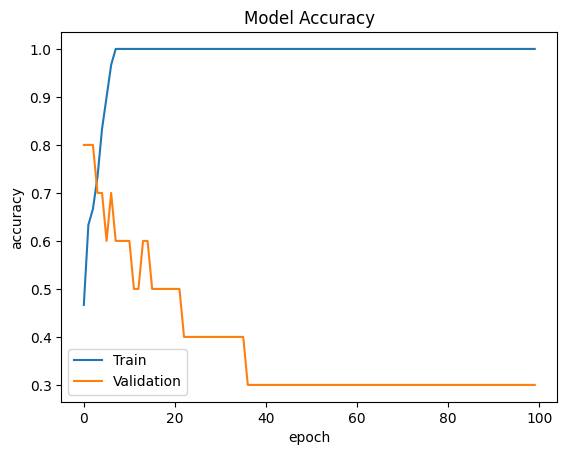

In [ ]:
accuracy_plot(history3)

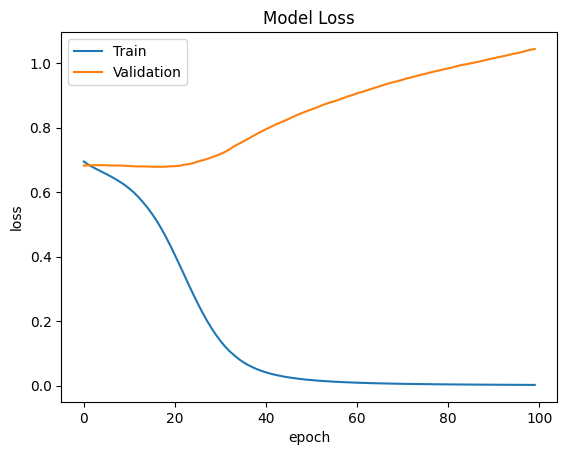

In [ ]:
loss_plot(history3)

In [ ]:
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6897 - accuracy: 0.6000 - val_loss: 0.7040 - val_accuracy: 0.1000 - 1s/epoch - 280ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6761 - accuracy: 0.7667 - val_loss: 0.7062 - val_accuracy: 0.1000 - 46ms/epoch - 11ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6645 - accuracy: 0.8000 - val_loss: 0.7090 - val_accuracy: 0.1000 - 45ms/epoch - 11ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6537 - accuracy: 0.8667 - val_loss: 0.7121 - val_accuracy: 0.1000 - 46ms/epoch - 12ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6413 - accuracy: 0.9333 - val_loss: 0.7146 - val_accuracy: 0.1000 - 56ms/epoch - 14ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6290 - accuracy: 0.9667 - val_loss: 0.7176 - val_accuracy: 0.1000 - 63ms/epoch - 16ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6155 - accuracy: 0.9667 - val_loss: 0.7202 - val_accuracy: 0.1000 - 64ms/epoch - 16ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6004 - accuracy: 0.9667 - val_loss: 0.7243 - val_accuracy: 0.1000 - 48ms/epoch - 12ms/step
Epoch 9/100
4/4 - 0s - lo

In [73]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                12032     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,257
Trainable params: 16,257
Non-trainable params: 0
_________________________________________________________________


In [88]:
model4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 69ms/step - loss: 1.5380 - accuracy: 0.3000


[1.5379773378372192, 0.30000001192092896]

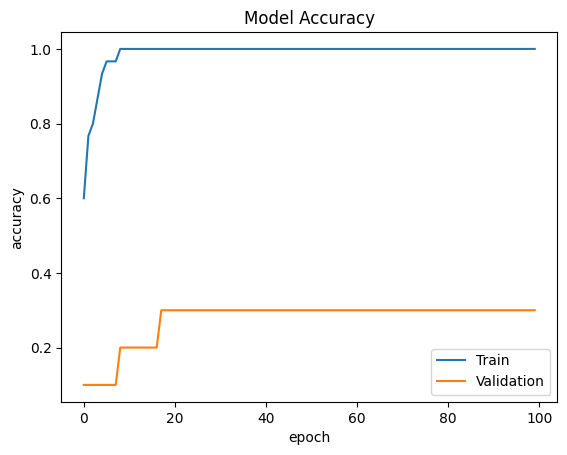

In [ ]:
accuracy_plot(history4)

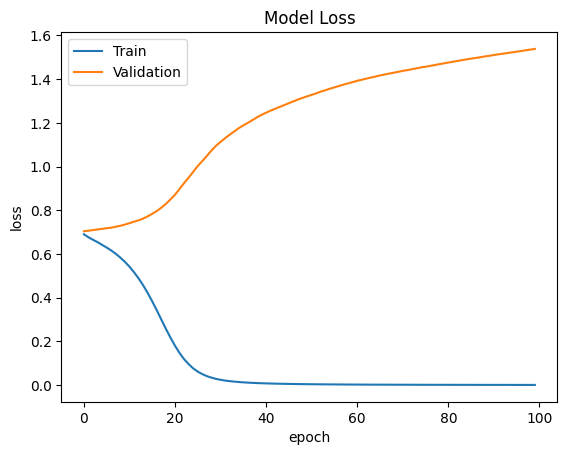

In [ ]:
loss_plot(history4)

In [ ]:
model5 = Sequential()
model5.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6981 - accuracy: 0.4000 - val_loss: 0.6978 - val_accuracy: 0.5000 - 1s/epoch - 269ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6740 - accuracy: 0.8667 - val_loss: 0.7013 - val_accuracy: 0.5000 - 70ms/epoch - 17ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6545 - accuracy: 0.9000 - val_loss: 0.7059 - val_accuracy: 0.4000 - 78ms/epoch - 19ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6348 - accuracy: 0.9333 - val_loss: 0.7103 - val_accuracy: 0.4000 - 65ms/epoch - 16ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6133 - accuracy: 1.0000 - val_loss: 0.7157 - val_accuracy: 0.4000 - 72ms/epoch - 18ms/step
Epoch 6/100
4/4 - 0s - loss: 0.5891 - accuracy: 1.0000 - val_loss: 0.7221 - val_accuracy: 0.4000 - 57ms/epoch - 14ms/step
Epoch 7/100
4/4 - 0s - loss: 0.5603 - accuracy: 1.0000 - val_loss: 0.7294 - val_accuracy: 0.4000 - 77ms/epoch - 19ms/step
Epoch 8/100
4/4 - 0s - loss: 0.5259 - accuracy: 1.0000 - val_loss: 0.7368 - val_accuracy: 0.4000 - 84ms/epoch - 21ms/step
Epoch 9/100
4/4 - 0s - lo

In [74]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               24064     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 40,705
Trainable params: 40,705
Non-trainable params: 0
_________________________________________________________________


In [89]:
model5.evaluate(X_test, y_test)

1/1 [==============================] - 0s 152ms/step - loss: 1.3713 - accuracy: 0.3000


[1.3712635040283203, 0.30000001192092896]

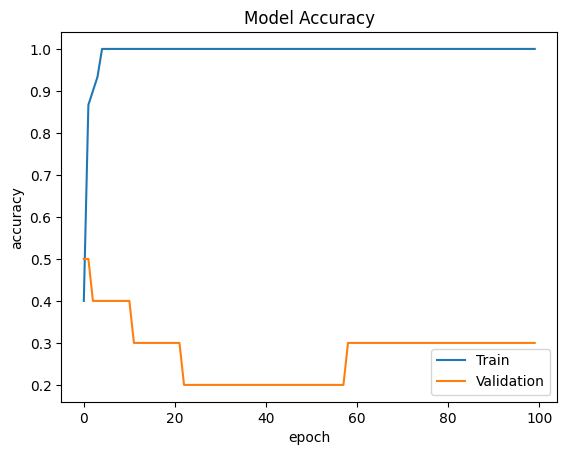

In [ ]:
accuracy_plot(history5)

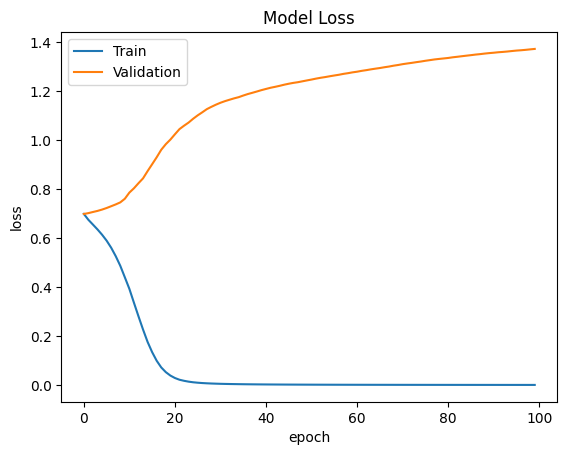

In [ ]:
loss_plot(history5)

In [ ]:
model6 = Sequential()
model6.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model6.add(Dense(8, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

model6.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.7039 - val_accuracy: 0.5000 - 1s/epoch - 268ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6577 - accuracy: 0.7000 - val_loss: 0.7057 - val_accuracy: 0.5000 - 82ms/epoch - 20ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6279 - accuracy: 0.9333 - val_loss: 0.7066 - val_accuracy: 0.5000 - 70ms/epoch - 18ms/step
Epoch 4/100
4/4 - 0s - loss: 0.5961 - accuracy: 1.0000 - val_loss: 0.7057 - val_accuracy: 0.5000 - 73ms/epoch - 18ms/step
Epoch 5/100
4/4 - 0s - loss: 0.5649 - accuracy: 1.0000 - val_loss: 0.7064 - val_accuracy: 0.5000 - 84ms/epoch - 21ms/step
Epoch 6/100
4/4 - 0s - loss: 0.5326 - accuracy: 1.0000 - val_loss: 0.7070 - val_accuracy: 0.5000 - 68ms/epoch - 17ms/step
Epoch 7/100
4/4 - 0s - loss: 0.4983 - accuracy: 1.0000 - val_loss: 0.7106 - val_accuracy: 0.5000 - 77ms/epoch - 19ms/step
Epoch 8/100
4/4 - 0s - loss: 0.4623 - accuracy: 1.0000 - val_loss: 0.7141 - val_accuracy: 0.5000 - 72ms/epoch - 18ms/step
Epoch 9/100
4/4 - 0s - lo

In [75]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 256)               48128     
                                                                 
 dense_18 (Dense)            (None, 8)                 2056      
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 50,193
Trainable params: 50,193
Non-trainable params: 0
_________________________________________________________________


In [90]:
model6.evaluate(X_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 1.1535 - accuracy: 0.2000


[1.1534916162490845, 0.20000000298023224]

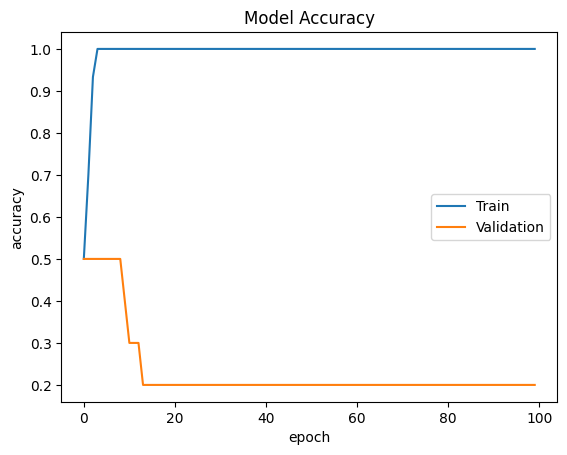

In [ ]:
accuracy_plot(history6)

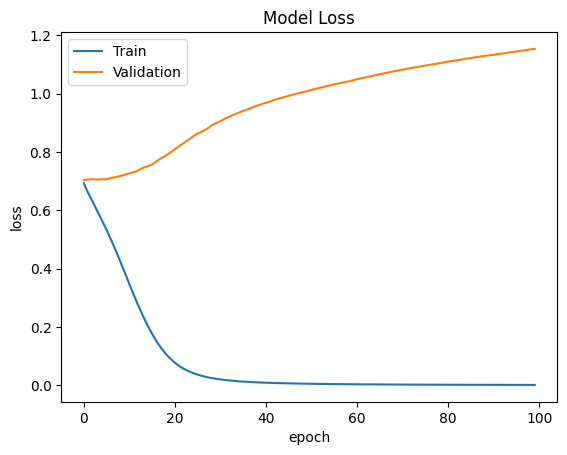

In [ ]:
loss_plot(history6)

In [ ]:
model7 = Sequential()
model7.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model7.add(Dense(8, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

model7.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6945 - accuracy: 0.4667 - val_loss: 0.6925 - val_accuracy: 0.7000 - 737ms/epoch - 184ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6714 - accuracy: 0.9000 - val_loss: 0.6907 - val_accuracy: 0.7000 - 45ms/epoch - 11ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6479 - accuracy: 1.0000 - val_loss: 0.6901 - val_accuracy: 0.7000 - 42ms/epoch - 11ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6241 - accuracy: 1.0000 - val_loss: 0.6902 - val_accuracy: 0.7000 - 41ms/epoch - 10ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6003 - accuracy: 1.0000 - val_loss: 0.6912 - val_accuracy: 0.7000 - 58ms/epoch - 14ms/step
Epoch 6/100
4/4 - 0s - loss: 0.5730 - accuracy: 1.0000 - val_loss: 0.6926 - val_accuracy: 0.6000 - 45ms/epoch - 11ms/step
Epoch 7/100
4/4 - 0s - loss: 0.5430 - accuracy: 1.0000 - val_loss: 0.6923 - val_accuracy: 0.7000 - 46ms/epoch - 12ms/step
Epoch 8/100
4/4 - 0s - loss: 0.5101 - accuracy: 1.0000 - val_loss: 0.6929 - val_accuracy: 0.6000 - 57ms/epoch - 14ms/step
Epoch 9/100
4/4 - 0s -

In [76]:
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               96256     
                                                                 
 dense_21 (Dense)            (None, 8)                 4104      
                                                                 
 dense_22 (Dense)            (None, 1)                 9         
                                                                 
Total params: 100,369
Trainable params: 100,369
Non-trainable params: 0
_________________________________________________________________


In [91]:
model7.evaluate(X_test, y_test)

1/1 [==============================] - 0s 44ms/step - loss: 1.1187 - accuracy: 0.4000


[1.1187012195587158, 0.4000000059604645]

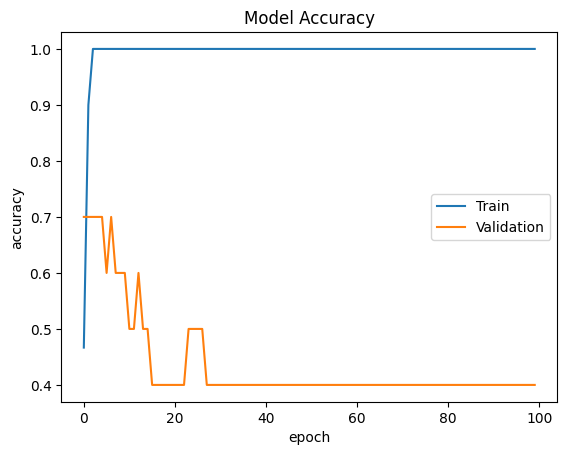

In [ ]:
accuracy_plot(history7)

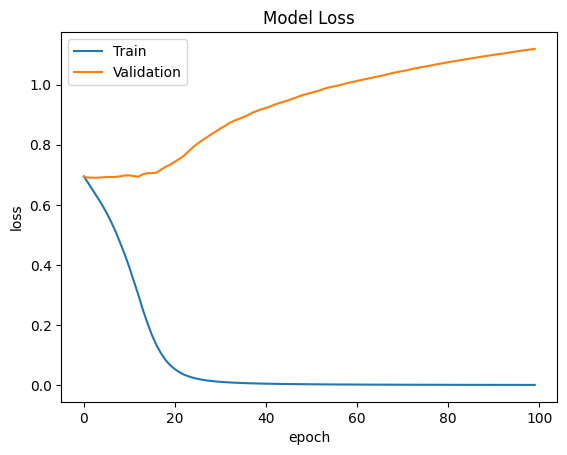

In [ ]:
loss_plot(history7)

In [ ]:
model8 = Sequential()
model8.add(Dense(1028, activation='relu', input_dim=X_train.shape[1]))
model8.add(Dense(8, activation='relu'))
model8.add(Dense(1, activation='sigmoid'))

model8.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history8 = model8.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6960 - val_accuracy: 0.5000 - 709ms/epoch - 177ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6516 - accuracy: 0.9333 - val_loss: 0.7012 - val_accuracy: 0.3000 - 56ms/epoch - 14ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6114 - accuracy: 1.0000 - val_loss: 0.7036 - val_accuracy: 0.2000 - 61ms/epoch - 15ms/step
Epoch 4/100
4/4 - 0s - loss: 0.5695 - accuracy: 1.0000 - val_loss: 0.7093 - val_accuracy: 0.3000 - 59ms/epoch - 15ms/step
Epoch 5/100
4/4 - 0s - loss: 0.5275 - accuracy: 1.0000 - val_loss: 0.7158 - val_accuracy: 0.4000 - 43ms/epoch - 11ms/step
Epoch 6/100
4/4 - 0s - loss: 0.4788 - accuracy: 1.0000 - val_loss: 0.7205 - val_accuracy: 0.3000 - 59ms/epoch - 15ms/step
Epoch 7/100
4/4 - 0s - loss: 0.4282 - accuracy: 1.0000 - val_loss: 0.7256 - val_accuracy: 0.3000 - 62ms/epoch - 15ms/step
Epoch 8/100
4/4 - 0s - loss: 0.3763 - accuracy: 1.0000 - val_loss: 0.7331 - val_accuracy: 0.2000 - 43ms/epoch - 11ms/step
Epoch 9/100
4/4 - 0s -

In [77]:
model8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1028)              193264    
                                                                 
 dense_24 (Dense)            (None, 8)                 8232      
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 201,505
Trainable params: 201,505
Non-trainable params: 0
_________________________________________________________________


In [92]:
model8.evaluate(X_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 1.1733 - accuracy: 0.3000


[1.1732900142669678, 0.30000001192092896]

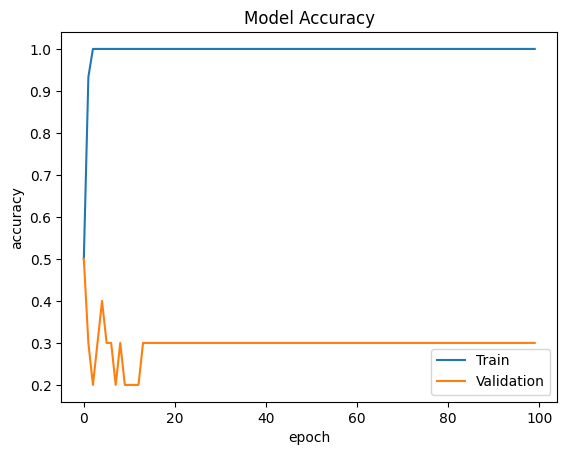

In [ ]:
accuracy_plot(history8)

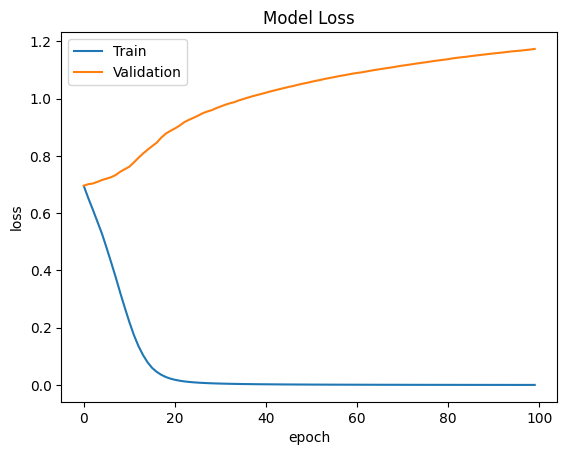

In [ ]:
loss_plot(history8)

### b. Model improvement - 2

In [ ]:
model11 = Sequential()
model11.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model11.add(Dense(32, activation='relu'))
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

In [ ]:
model11.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history11 = model11.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6912 - accuracy: 0.5667 - val_loss: 0.7026 - val_accuracy: 0.4000 - 775ms/epoch - 194ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6830 - accuracy: 0.5667 - val_loss: 0.7040 - val_accuracy: 0.4000 - 50ms/epoch - 12ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6767 - accuracy: 0.6000 - val_loss: 0.7066 - val_accuracy: 0.4000 - 62ms/epoch - 16ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6692 - accuracy: 0.6333 - val_loss: 0.7088 - val_accuracy: 0.4000 - 50ms/epoch - 12ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6622 - accuracy: 0.6667 - val_loss: 0.7119 - val_accuracy: 0.4000 - 64ms/epoch - 16ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6534 - accuracy: 0.7000 - val_loss: 0.7153 - val_accuracy: 0.4000 - 64ms/epoch - 16ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6441 - accuracy: 0.7000 - val_loss: 0.7197 - val_accuracy: 0.4000 - 46ms/epoch - 11ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6330 - accuracy: 0.7000 - val_loss: 0.7258 - val_accuracy: 0.4000 - 71ms/epoch - 18ms/step
Epoch 9/100
4/4 - 0s -

In [78]:
model11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                6016      
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


In [93]:
model11.evaluate(X_test, y_test)

1/1 [==============================] - 0s 58ms/step - loss: 1.4228 - accuracy: 0.3000


[1.4228119850158691, 0.30000001192092896]

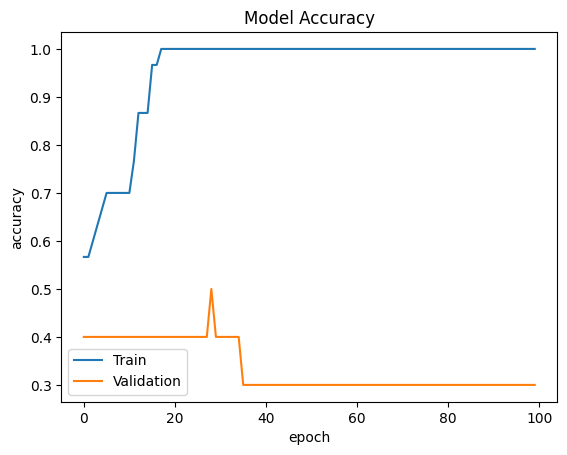

In [ ]:
accuracy_plot(history11)

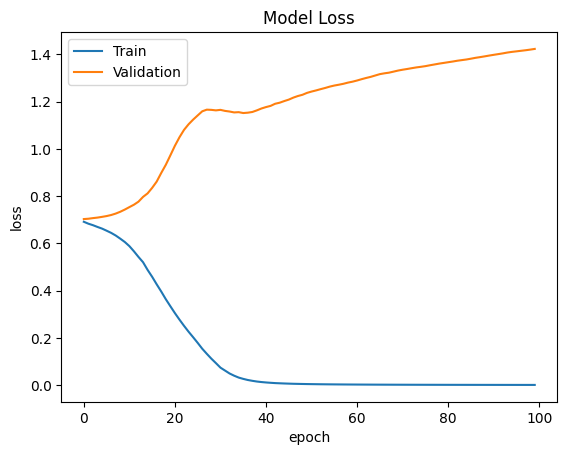

In [ ]:
loss_plot(history11)

In [ ]:
model12 = Sequential()
model12.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model12.add(Dense(32, activation='relu'))
model12.add(Dense(32, activation='relu'))
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))

In [ ]:
model12.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history12 = model12.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000 - 864ms/epoch - 216ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6891 - accuracy: 0.6000 - val_loss: 0.6943 - val_accuracy: 0.6000 - 52ms/epoch - 13ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6840 - accuracy: 0.7667 - val_loss: 0.6946 - val_accuracy: 0.6000 - 54ms/epoch - 14ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6795 - accuracy: 0.8000 - val_loss: 0.6963 - val_accuracy: 0.6000 - 68ms/epoch - 17ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6750 - accuracy: 0.8000 - val_loss: 0.6983 - val_accuracy: 0.6000 - 51ms/epoch - 13ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6690 - accuracy: 0.8333 - val_loss: 0.7013 - val_accuracy: 0.5000 - 61ms/epoch - 15ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6611 - accuracy: 0.8667 - val_loss: 0.7046 - val_accuracy: 0.5000 - 73ms/epoch - 18ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6517 - accuracy: 0.8667 - val_loss: 0.7089 - val_accuracy: 0.4000 - 72ms/epoch - 18ms/step
Epoch 9/100
4/4 - 0s -

In [79]:
model12.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                6016      
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 32)                1056      
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [94]:
model12.evaluate(X_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 2.1228 - accuracy: 0.3000


[2.1227753162384033, 0.30000001192092896]

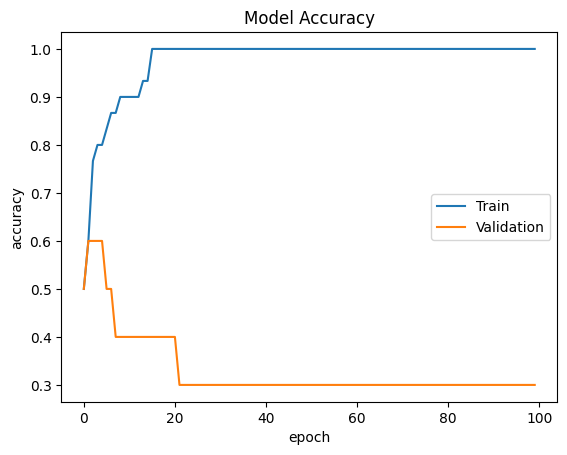

In [ ]:
accuracy_plot(history12)

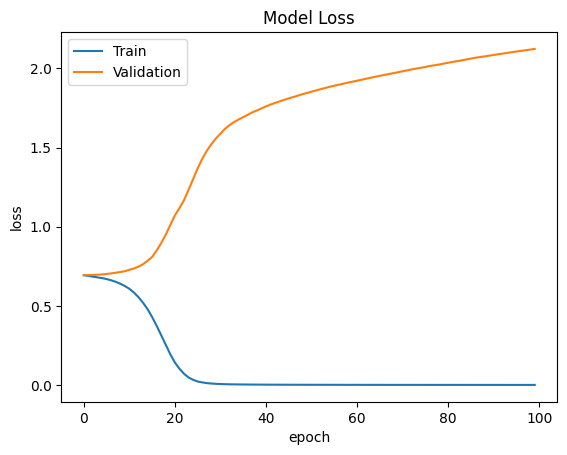

In [ ]:
loss_plot(history12)

In [ ]:
model13 = Sequential()
model13.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model13.add(Dense(32, activation='relu'))
model13.add(Dense(32, activation='relu'))
model13.add(Dense(32, activation='relu'))
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))

In [ ]:
model13.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history13 = model13.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6958 - accuracy: 0.3333 - val_loss: 0.6953 - val_accuracy: 0.3000 - 929ms/epoch - 232ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6907 - accuracy: 0.5667 - val_loss: 0.6976 - val_accuracy: 0.4000 - 61ms/epoch - 15ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6868 - accuracy: 0.5667 - val_loss: 0.6989 - val_accuracy: 0.4000 - 43ms/epoch - 11ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6836 - accuracy: 0.5333 - val_loss: 0.7022 - val_accuracy: 0.4000 - 61ms/epoch - 15ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6800 - accuracy: 0.5333 - val_loss: 0.7056 - val_accuracy: 0.4000 - 42ms/epoch - 11ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6727 - accuracy: 0.5333 - val_loss: 0.7086 - val_accuracy: 0.4000 - 44ms/epoch - 11ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6654 - accuracy: 0.5333 - val_loss: 0.7122 - val_accuracy: 0.4000 - 48ms/epoch - 12ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6556 - accuracy: 0.5333 - val_loss: 0.7181 - val_accuracy: 0.4000 - 43ms/epoch - 11ms/step
Epoch 9/100
4/4 - 0s -

In [80]:
model13.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 32)                6016      
                                                                 
 dense_36 (Dense)            (None, 32)                1056      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 10,273
Trainable params: 10,273
Non-tra

In [96]:
model13.evaluate(X_test, y_test)

1/1 [==============================] - 0s 71ms/step - loss: 1.6723 - accuracy: 0.4000


[1.6722990274429321, 0.4000000059604645]

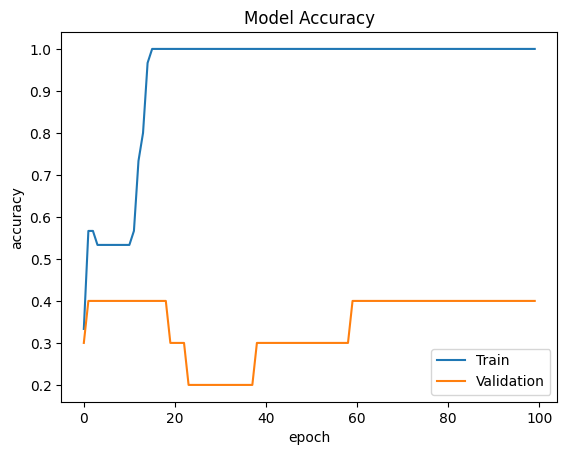

In [ ]:
accuracy_plot(history13)

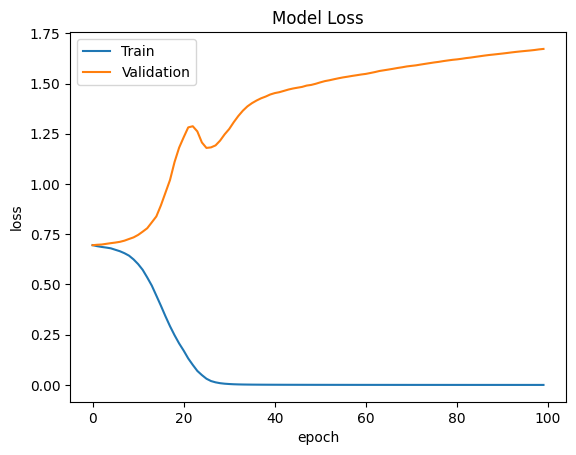

In [ ]:
loss_plot(history13)

In [ ]:
model14 = Sequential()
model14.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model14.add(Dense(32, activation='relu'))
model14.add(Dense(32, activation='relu'))
model14.add(Dense(32, activation='relu'))
model14.add(Dense(32, activation='relu'))
model14.add(Dense(32, activation='relu'))
model14.add(Dense(1, activation='sigmoid'))

In [ ]:
model14.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history14 = model14.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test,y_test), validation_split=0.2, batch_size=8)

Epoch 1/100
4/4 - 1s - loss: 0.6942 - accuracy: 0.4000 - val_loss: 0.6941 - val_accuracy: 0.3000 - 904ms/epoch - 226ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6911 - accuracy: 0.6667 - val_loss: 0.6951 - val_accuracy: 0.4000 - 61ms/epoch - 15ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6889 - accuracy: 0.5333 - val_loss: 0.6960 - val_accuracy: 0.4000 - 51ms/epoch - 13ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6871 - accuracy: 0.5333 - val_loss: 0.6970 - val_accuracy: 0.4000 - 48ms/epoch - 12ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6833 - accuracy: 0.5667 - val_loss: 0.6976 - val_accuracy: 0.4000 - 50ms/epoch - 12ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6798 - accuracy: 0.6000 - val_loss: 0.6990 - val_accuracy: 0.4000 - 62ms/epoch - 15ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6742 - accuracy: 0.6333 - val_loss: 0.7011 - val_accuracy: 0.4000 - 51ms/epoch - 13ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6656 - accuracy: 0.6667 - val_loss: 0.7035 - val_accuracy: 0.4000 - 55ms/epoch - 14ms/step
Epoch 9/100
4/4 - 0s -

In [81]:
model14.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 32)                6016      
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dense_43 (Dense)            (None, 32)                1056      
                                                                 
 dense_44 (Dense)            (None, 32)                1056      
                                                                 
 dense_45 (Dense)            (None, 32)                1056      
                                                                 
 dense_46 (Dense)            (None, 32)                1056      
                                                                 
 dense_47 (Dense)            (None, 1)               

In [97]:
model14.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 1.6881 - accuracy: 0.5000


[1.6880972385406494, 0.5]

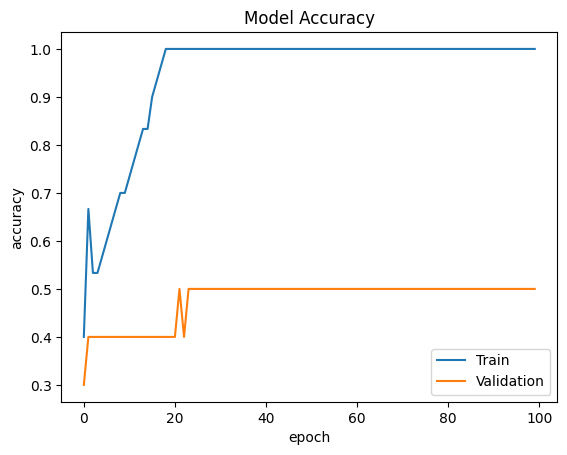

In [ ]:
accuracy_plot(history14)

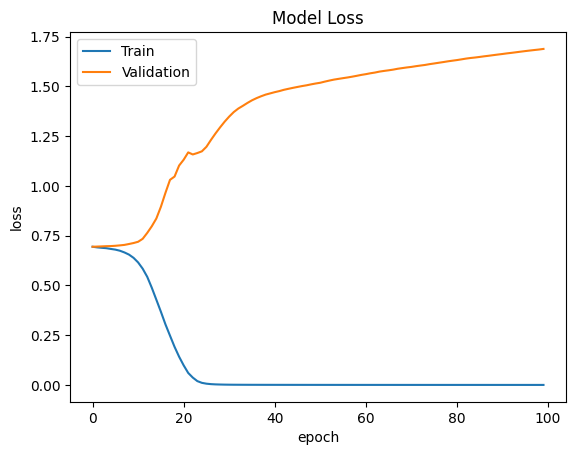

In [ ]:
loss_plot(history14)

BEST CONFIGURATION:

In [98]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.9338 - accuracy: 0.4000


[0.9338079690933228, 0.4000000059604645]

In [99]:
model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.6865 - accuracy: 0.5000


[0.6864554286003113, 0.5]

In [100]:
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.9991 - accuracy: 0.3000


[0.9990969896316528, 0.30000001192092896]

In [101]:
model3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 1.0443 - accuracy: 0.3000


[1.044335126876831, 0.30000001192092896]

In [102]:
model4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 1.5380 - accuracy: 0.3000


[1.5379773378372192, 0.30000001192092896]

In [103]:
model5.evaluate(X_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 1.3713 - accuracy: 0.3000


[1.3712635040283203, 0.30000001192092896]

In [104]:
model6.evaluate(X_test, y_test)

1/1 [==============================] - 0s 33ms/step - loss: 1.1535 - accuracy: 0.2000


[1.1534916162490845, 0.20000000298023224]

In [105]:
model7.evaluate(X_test, y_test)

1/1 [==============================] - 0s 48ms/step - loss: 1.1187 - accuracy: 0.4000


[1.1187012195587158, 0.4000000059604645]

In [106]:
model8.evaluate(X_test, y_test)

1/1 [==============================] - 0s 49ms/step - loss: 1.1733 - accuracy: 0.3000


[1.1732900142669678, 0.30000001192092896]

In [107]:
model11.evaluate(X_test, y_test)

1/1 [==============================] - 0s 37ms/step - loss: 1.4228 - accuracy: 0.3000


[1.4228119850158691, 0.30000001192092896]

In [108]:
model12.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 2.1228 - accuracy: 0.3000


[2.1227753162384033, 0.30000001192092896]

In [109]:
model13.evaluate(X_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 1.6723 - accuracy: 0.4000


[1.6722990274429321, 0.4000000059604645]

In [110]:
model14.evaluate(X_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 1.6881 - accuracy: 0.5000


[1.6880972385406494, 0.5]

Comparing all the models, model1 (i.e., a single layer model with 8 nodes) has the best configuration with accuracy: 0.5000 and loss: 0.6865